# Question 3

In [665]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.DataFrame(pd.read_csv('TaxiData.csv'))

## 3.a Fare and Tip Distribution
### (a) Histograms and box plots for fare and tip amounts
Here are the histograms drawn for both fare and tips

I've observed that there's one `fare` which is 700.7, way higher compared to others which are in range of 100s. This is clearly an outlier,
without this the graph is way smaller as there is a huge gap with no fare values in it.

Something similar is happening in `tips` where we have an outlier tip of 47.0, which is way higher than the rest of the tips. A lot of
people tipped 0, which leads to a very huge spike at 0. Due to this, many bins are invisible even though they have values in them.



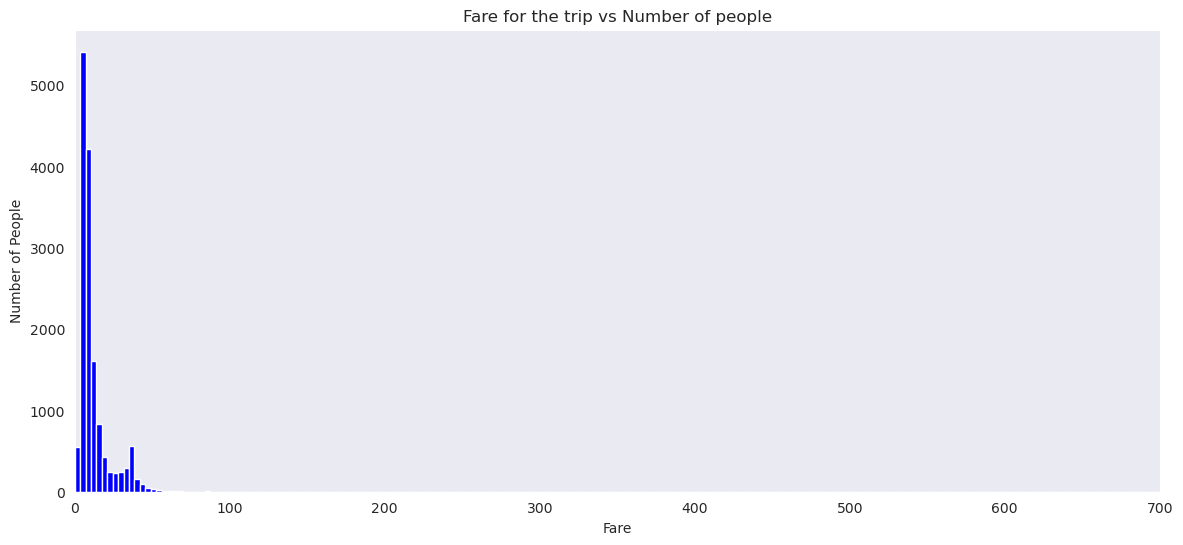

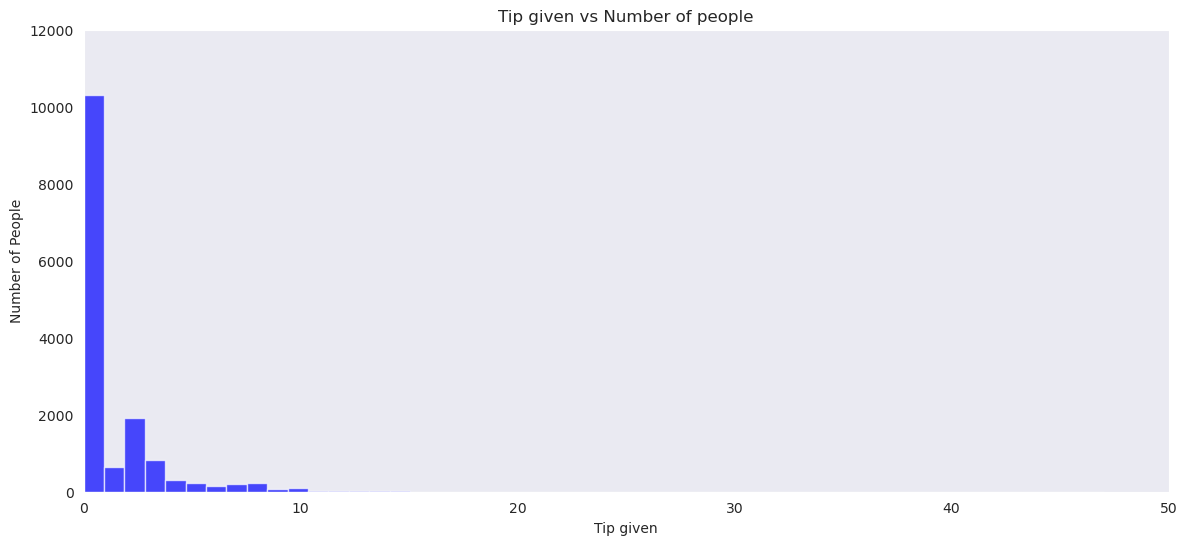

Maximum fare: 700.07
Minimum fare: 0.0
Maximum tip: 47.0
Minimum tip: 0.0


In [666]:
data.hist(column=['fare'], bins=200, grid=False, figsize=(14, 6), color='blue', alpha=1)
plt.title('Fare for the trip vs Number of people')
plt.xlabel('Fare')
plt.ylabel('Number of People')
plt.xlim(0, 700)

data.hist(column=['tips'], bins=50, grid=False, figsize=(14, 6), color='blue', alpha=0.7)
plt.title('Tip given vs Number of people')
plt.xlabel('Tip given')
plt.ylabel('Number of People')
plt.xlim(0, 50)
plt.ylim(0, 12000)
plt.show()
print(f'Maximum fare: {data["fare"].max()}')
print(f'Minimum fare: {data["fare"].min()}')
print(f'Maximum tip: {data["tips"].max()}')
print(f'Minimum tip: {data["tips"].min()}')

Here are the box plots for both fare and tips.

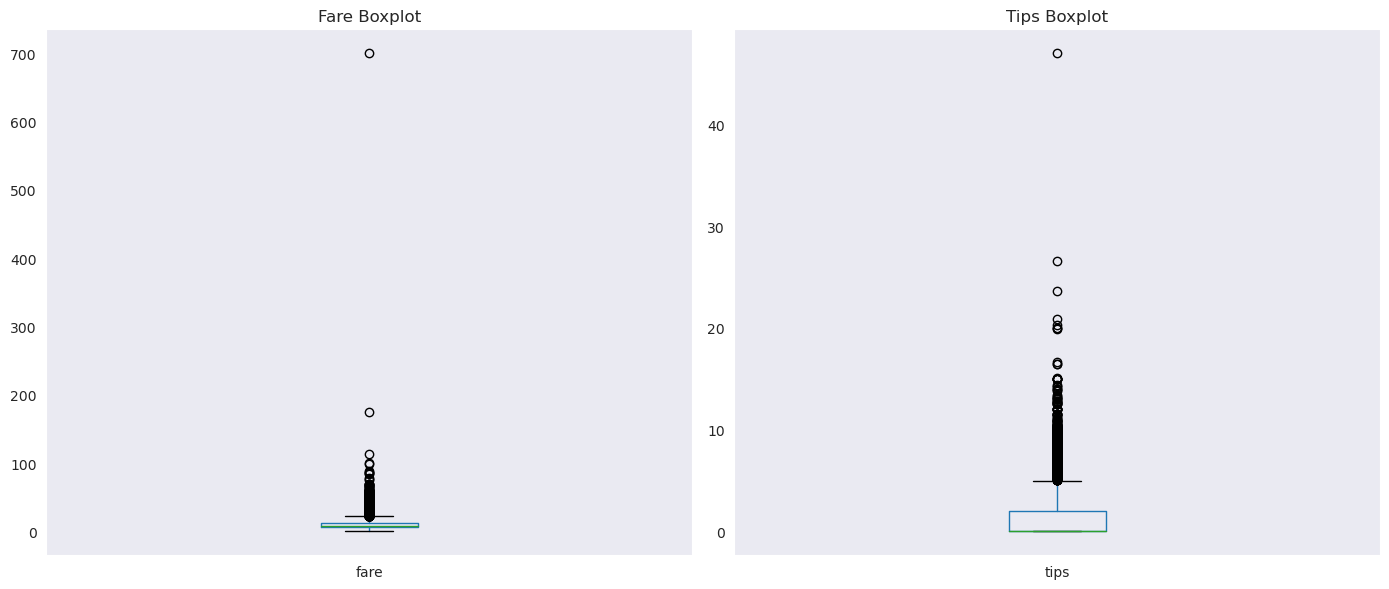

In [667]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
data.boxplot(column=['fare'], grid=False, ax=axes[0], figsize=(14, 6))
axes[0].set_title('Fare Boxplot')
data.boxplot(column=['tips'], grid=False, ax=axes[1], figsize=(14, 6))
axes[1].set_title('Tips Boxplot')
plt.tight_layout()
plt.show()

### (b) Identification of outliers, range, clusters

As can be seen from the box plots, there are outliers in both fare and tips.
* Outlier in fare: there's a fare of 700.07 which occurred only once, hence it's an outlier.
* Outlier in tips: there's a tip of 47.00 which occurred only once, hence it's an outlier.

The ranges are as follows:
* For fare: 0.0 to 700.07
* For tips: 0.0 to 47.0

Three clusters can be identified in the fare:
* Cluster 1: 0.0 to around 20.0
* Cluster 2: 20.0 to around 45.0
* Cluster 3: 45.0 to around 700

One cluster can be identified in the tips:
* Cluster 1: 0.0 to around 9.0
 
### (c) Interpretation
The above values were what I've seen visually from the graphs, here are more accurate values for which I have used some
concepts from robust statistics.

We'll start with:
Statistical summary for fare



In [668]:
fare_summary = data['fare'].describe()
fare_mean = fare_summary['mean']
fare_median = data['fare'].median()
fare_std = fare_summary['std']

print(f"Fare mean: {fare_mean}\nFare median: {fare_median}\nFare standard deviation: {fare_std}")


Fare mean: 11.768216237834956
Fare median: 7.85
Fare standard deviation: 11.538850470754118


Statistical summary for tips


In [669]:
tips_summary = data['tips'].describe()
tips_mean = tips_summary['mean']
tips_median = data['tips'].median()
tips_std = tips_summary['std']

print(f"Tips mean: {tips_mean}\nTips median: {tips_median}\nTips standard deviation: {tips_std}")


Tips mean: 1.0766744434075455
Tips median: 0.0
Tips standard deviation: 2.1583404234827888


Identifying outliers using IQR

In [670]:
fare_q1 = data['fare'].quantile(0.25)
fare_q3 = data['fare'].quantile(0.75)
fare_iqr = fare_q3 - fare_q1
fare_outliers = data[(data['fare'] < (fare_q1 - 1.5 * fare_iqr)) | (data['fare'] > (fare_q3 + 1.5 * fare_iqr))]

tips_q1 = data['tips'].quantile(0.25)
tips_q3 = data['tips'].quantile(0.75)
tips_iqr = tips_q3 - tips_q1
tips_outliers = data[(data['tips'] < (tips_q1 - 1.5 * tips_iqr)) | (data['tips'] > (tips_q3 + 1.5 * tips_iqr))]

print(f"No. of fare outliers: {len(fare_outliers)}")
print(f"No. of tips outliers: {len(tips_outliers)}")


No. of fare outliers: 1872
No. of tips outliers: 839


Analysis of clusters

In [671]:
fare_clusters = data['fare'].value_counts(bins=[0, 20, 45, 700])
tips_clusters = data['tips'].value_counts(bins=[0, 9, 47])

print(f"Fare Clusters:\n{fare_clusters}")
print(f"Tips Clusters:\n{tips_clusters}")


Fare Clusters:
(-0.001, 20.0]    12932
(20.0, 45.0]       1917
(45.0, 700.0]       152
Name: count, dtype: int64
Tips Clusters:
(-0.001, 9.0]    14812
(9.0, 47.0]        190
Name: count, dtype: int64


## 3.b Payment Method Insights
### (a) Visualizing frequency of each payment method

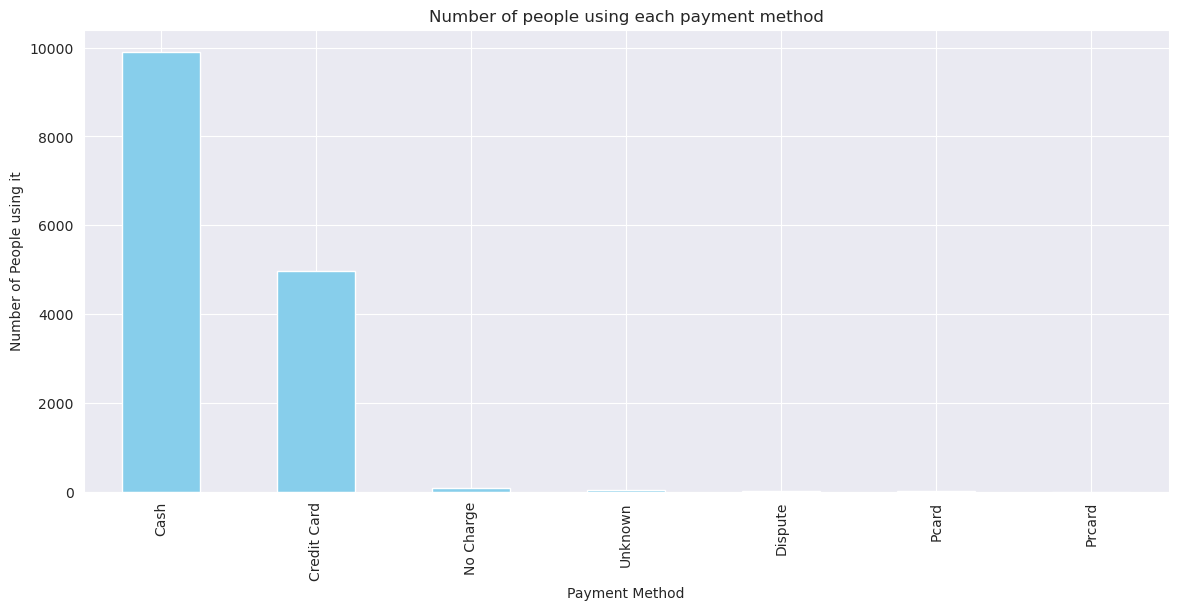

In [672]:
payment_counts = data['payment_type'].value_counts()
payment_counts.plot.bar(color='skyblue', figsize=(14, 6))
plt.title("Number of people using each payment method")
plt.xlabel("Payment Method")
plt.ylabel("Number of People using it")
plt.show()

<AxesSubplot:ylabel='count'>

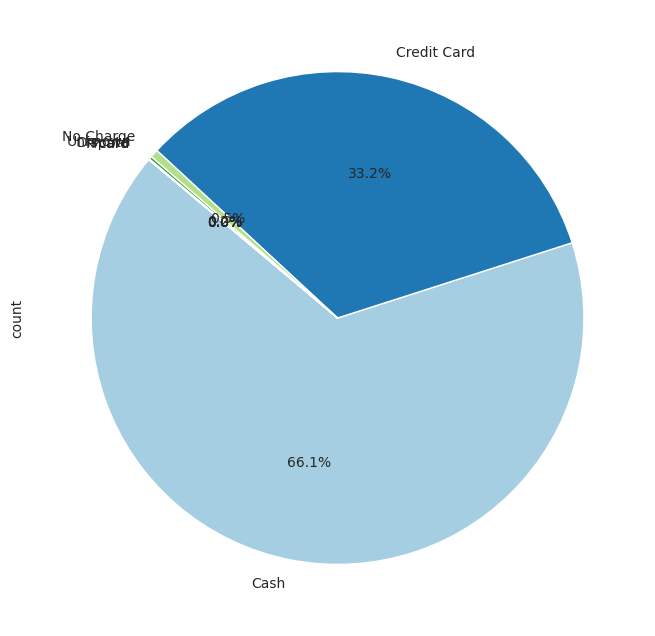

In [673]:
payment_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors, figsize=(8, 8))


As can be seen every other payment method except cash and credit card has been used to a very less extent. This leaves the pie chart
with only two colors, which are cash and credit card. The rest of the payment methods are very visible in the pie chart. The same thing
happens with the bar chart where the other payment methods are overshadowed by these two dominant methods.
### (b) Interpretation

* Cash is the most preferred payment method, followed by credit card and debit card.
* The least preferred payment method is prcard.

Here are the ways it might impact service providers
* Cash Dominance: The dominance of cash payments may require service providers to handle large amounts of cash, which can increase the risk of theft and the need for secure cash handling procedures.
* Credit Card Usage: The significant use of credit cards suggests that service providers should ensure they have reliable and secure card processing systems in place. This can also lead to higher transaction fees.
* Customer Preferences: Understanding customer payment preferences can help service providers tailor their services and payment options to meet customer needs, potentially improving customer satisfaction and loyalty.


## 3.c Tips by Payment Method
### (a) A box plot comparing tips across different payment methods

Text(0, 0.5, 'Number of people')

<Figure size 1400x600 with 0 Axes>

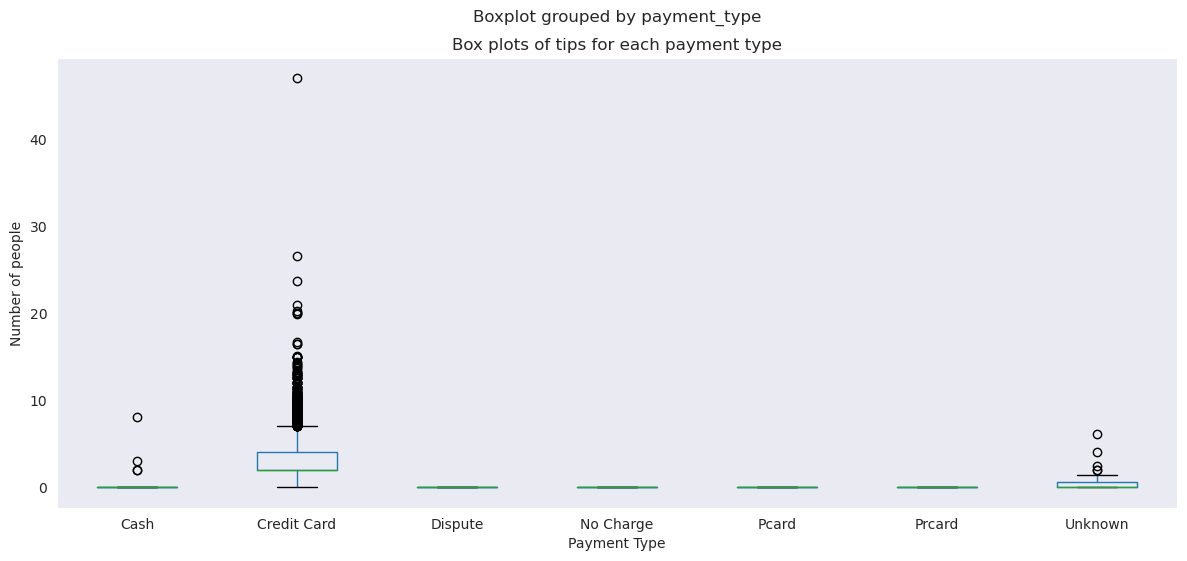

In [674]:
plt.figure(figsize=(14, 6))
data.boxplot(column='tips', by='payment_type', grid=False, figsize=(14, 6))
plt.title("Box plots of tips for each payment type")
plt.xlabel("Payment Type")
plt.ylabel("Number of people")

### (b) Interpretation

* The below results show that the average tips rate is very high for payments done by credit card, compared to other payment types.
* This implies that people who use credit cards pay more tips
* This is reasonable since they are more likely to be from higher income groups.
* We can also see from the boxplot that the range of tips from people who used credit card is way higher.
* It can also be seen that there are quite a lot of people who tipped, but the data doesn't have the payment type for them, so we missed them.

In [675]:
tips_by_payment = data.groupby('payment_type')['tips'].mean()
print(tips_by_payment)

payment_type
Cash           0.001519
Credit Card    3.239668
Dispute        0.000000
No Charge      0.000000
Pcard          0.000000
Prcard         0.000000
Unknown        0.685172
Name: tips, dtype: float64


## 3.d Fare vs. Distance
### (a) Scatter plot showing relation between trip distance and fare

Text(0, 0.5, 'Fare')

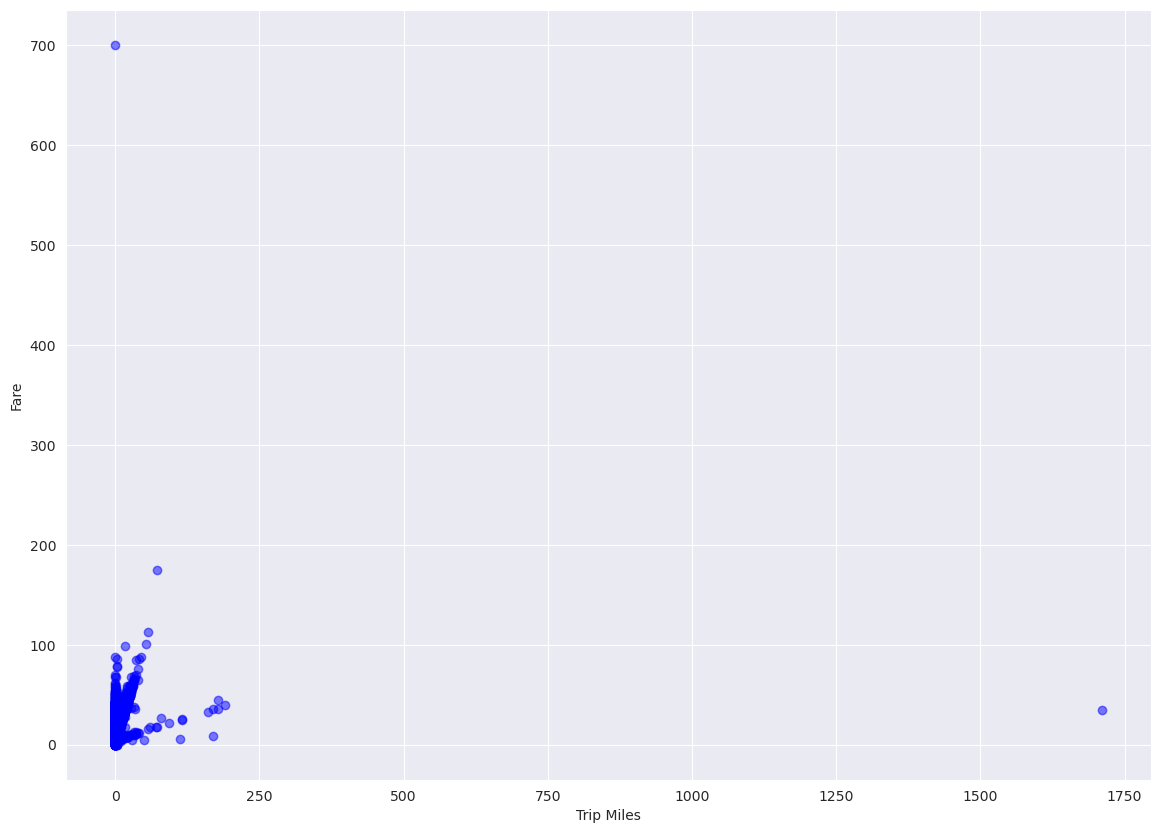

In [676]:
plt.figure(figsize=(14, 10))
plt.scatter(data['trip_miles'], data['fare'], alpha=0.5, c='blue')
plt.xlabel('Trip Miles')
plt.ylabel('Fare')

### (b) Correlation coefficient between two variables

In [677]:
correlation = data['trip_miles'].corr(data['fare'])
print(f'Correlation between trip miles and fare is: {correlation}')

Correlation between trip miles and fare is: 0.22380232969278896


### (c) Interpretation

* There is positive correlation between fare and trip distance, which means that as the trip distance increases, the fare also increases.
* From the scatter plot, we can see that there are around 4 "lines" forming.
* These lines can be considered as individual clusters, each adding to positive correlation
* There are also two outliers as can be seen, these are affecting the correlation coefficient.
* From this plot, we can see that the fare vs trip_miles line's slope is too high for small values of trip_miles,
  this is due to the fact that higher fare/mile is being charged for shorter travel.
* Similarly, the fare/mile is a bit lower for lower distance traveled.